<a href="https://colab.research.google.com/github/kamalmukhalalaty/Deep-Learning-Projects/blob/main/ResNet%20From%20Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EX ResNet

https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/ 

Find the ResNet section, and follow the tutorial. Bring this into Colab, carefully understanding how the various facets of the code relates to the content of the lecture.

How to Implement the Residual Module:

The Residual Network, or ResNet, architecture for convolutional neural networks was proposed by Kaiming He, et al. in their 2016 paper titled “Deep Residual Learning for Image Recognition,” which achieved success on the 2015 version of the ILSVRC challenge.

A key innovation in the ResNet was the residual module. The residual module, specifically the identity residual model, is a block of two convolutional layers with the same number of filters and a small filter size where the output of the second layer is added with the input to the first convolutional layer. Drawn as a graph, the input to the module is added to the output of the module and is called a shortcut connection.

We can implement this directly in Keras using the functional API and the add() merge function.

A limitation with this direct implementation is that if the number of filters in the input layer does not match the number of filters in the last convolutional layer of the module (defined by n_filters), then we will get an error.

One solution is to use a 1×1 convolution layer, often referred to as a projection layer, to either increase the number of filters for the input layer or reduce the number of filters for the last convolutional layer in the module. The former solution makes more sense, and is the approach proposed in the paper, referred to as a projection shortcut.

When the dimensions increase […], we consider two options: (A) The shortcut still performs identity mapping, with extra zero entries padded for increasing dimensions. This option introduces no extra parameter; (B) The projection shortcut […] is used to match dimensions (done by 1×1 convolutions).

— Deep Residual Learning for Image Recognition, 2015.

Below is an updated version of the function that will use the identity if possible, otherwise a projection of the number of filters in the input does not match the n_filters argument.

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 256         input_1[0][0]                    
______________________________________________________________________________________________

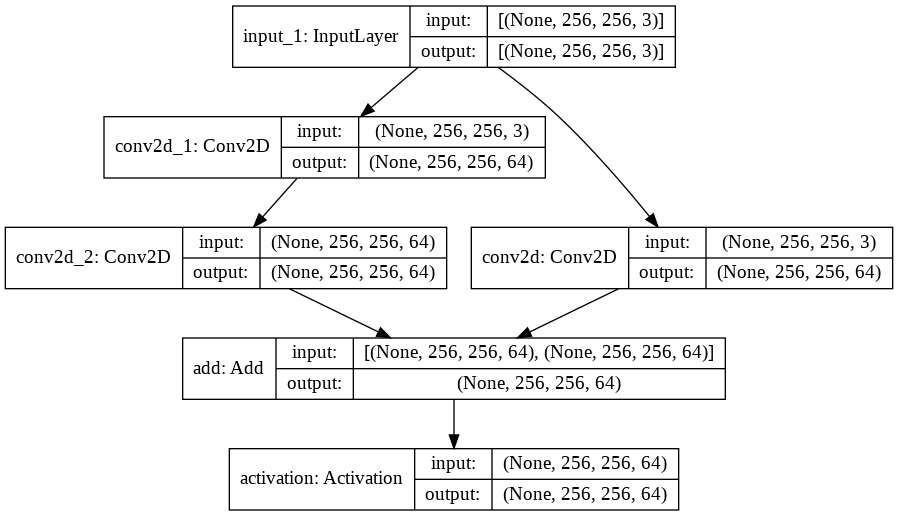

In [ ]:
# example of a CNN model with an identity or projection residual module
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model
 
# function for creating an identity or projection residual module
def residual_module(layer_in, n_filters):
	merge_input = layer_in
	# check if the number of filters needs to be increase, assumes channels last format
	if layer_in.shape[-1] != n_filters:
		merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
	# conv1
	conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
	# conv2
	conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
	# add filters, assumes filters/channels last
	layer_out = add([conv2, merge_input])
	# activation function
	layer_out = Activation('relu')(layer_out)
	return layer_out
 
# define model input
visible = Input(shape=(256, 256, 3))
# add vgg module
layer = residual_module(visible, 64)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='residual_module.png')

# Dataset 1

the data

"x = np.linspace(0, 5, N)\ntofit = np.sin(4 * x) + .6 * np.sin(10*x) - .5 * np.cos(3 * np.cos(10 * x))\nplt.plot(x, tofit, c='k', lw=4, label='Data')"

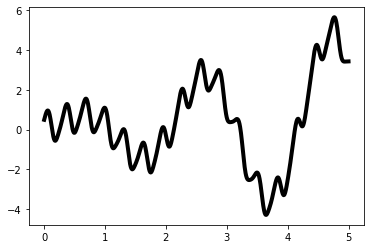

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

s=2564738
np.random.seed(seed=s)

N=1000

x = np.linspace(0, 5, N)
tofit = np.sin(3 * x)*x + .6 * np.sin(20*x) - .5 * np.cos(3 * np.cos(10 * x))
plt.plot(x, tofit, c='k', lw=4, label='Data')


'''x = np.linspace(0, 5, N)
tofit = np.sin(4 * x) + .6 * np.sin(10*x) - .5 * np.cos(3 * np.cos(10 * x))
plt.plot(x, tofit, c='k', lw=4, label='Data')'''

## Take a simple MLP-3 that you have developed in a prior assignment. Add two additional layers to this MLP-3 and train the resulting MLP-5. Note the characteristics of the training process (number of iterations, error per iteration).

### Un-Regularized MLP-5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

data=x.reshape(N,1)
labels=tofit.reshape(N,1)

X=data
N=X.shape[0]
D=X.shape[1]
H1=5
H2=5 #number of hidden nurons
H3=5 #number of hidden nurons          ######### this was 1
H4=5
H5=1

num_steps = 100000
alpha = .001
#lamda=0.001


# First, initialize our neural network parameters.
params = {}
params['W_1'] = np.random.randn(H1, D)
params['b_1'] = np.zeros([1,H1])
params['W_2'] = np.random.randn(H2, H1)
params['b_2'] = np.zeros([1,H2])

params['W_3'] = np.random.randn(H3, H2)
params['b_3'] = np.zeros([1,H3])
params['W_4'] = np.random.randn(H4, H3)
params['b_4'] = np.zeros([1,H4])
params['W_5'] = np.random.randn(H5, H4)
params['b_5'] = np.zeros([1,H5])

epoch   0 | Loss 65.51
epoch 10000 | Loss 2.33
epoch 20000 | Loss 1.15
epoch 30000 | Loss 0.37
epoch 40000 | Loss 0.30
epoch 50000 | Loss 0.28
epoch 60000 | Loss 0.27
epoch 70000 | Loss 0.26
epoch 80000 | Loss 0.25
epoch 90000 | Loss 0.24


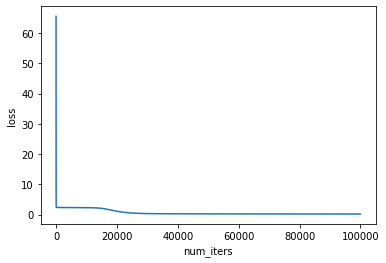

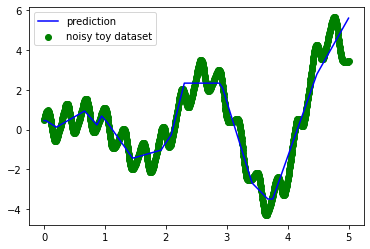

In [ ]:
def Relu(x):
    return x * (x > 0)

# Notice we make use of numpy's broadcasting when adding the bias b.
# this function is designed for testing tuned
def forward_reg(X, params):    
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4'])
    H_4 = Relu(z_4)

    y = np.dot(H_4, params['W_5'].T) +  np.dot(np.ones([N,1]),params['b_5'])
##################################
    return y

def LogisticCrossEntropyLoss (N,t,z):
  return (1./N) * np.sum(t * np.log(1+np.exp(-z)) - (1 - t) * np.log(1 +np.exp(z)))

def CrossEntropyLoss (N,t,y):
  return (1./N) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
##################################################################################
def LeastSquaresLoss (N,t,y):
  return (1/(2*N))*np.dot((y-t).T,(y-t))

def loss_ridge (N,t,y,w1,w2,w3,w4,w5,lamda):    # CHANGE MADE HERE  CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE
  return (((1/(2*N))*np.dot((y-t).T,(y-t))) + ((lamda/(2*N)) * (np.dot(w1.T,w1)[0,0]+np.dot(w2.T,w2)[0,0]+np.dot(w3.T,w3)[0,0]+np.dot(w4.T,w4)[0,0]+np.dot(w5.T,w5)[0,0])))
##################################################################################
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

def dRelu(x):
    return 1. * (x > 0)

def backprop_reg(X, t, params):

    N = X.shape[0] # already defined

    # Perform forwards computation.
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4'])
    H_4 = Relu(z_4)

    y = np.dot(H_4, params['W_5'].T) +  np.dot(np.ones([N,1]),params['b_5'])
##################################
    loss = LeastSquaresLoss(N,t,y)  
    #loss = loss_ridge (N,t,y,params['W_1'],params['W_2'],params['W_3'],params['W_4'],params['W_5'],lamda)                ### CHANGE MADE HERE CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE

##################################

    # Perform backwards computation. # over all training egs.
    E_bar = 1
    y_bar = (1./N) * (y - t)
    W_5_bar = np.dot(y_bar.T, H_4) #+ (lamda/(N))* params['W_5']  # 
    b_5_bar = np.dot(np.ones([1,N]),y_bar)
    H_4_bar = np.dot(y_bar, params['W_5'])   #####    500,1   1,3

    #

    z_4_bar = H_4_bar * dRelu(z_4)
    W_4_bar = np.dot(z_4_bar.T,H_3) #+ (lamda/(N))* params['W_4'] 
    b_4_bar = np.dot(np.ones([1,N]),z_4_bar)
    H_3_bar = np.dot(z_4_bar, params['W_4']) 

    #

    z_3_bar = H_3_bar * dRelu(z_3)
    W_3_bar = np.dot(z_3_bar.T,H_2) #+ (lamda/(N))* params['W_3'] 
    b_3_bar = np.dot(np.ones([1,N]),z_3_bar)
    H_2_bar = np.dot(z_3_bar, params['W_3']) 

    #

    z_2_bar = H_2_bar * dRelu(z_2)
    W_2_bar = np.dot(z_2_bar.T,H_1) #+ (lamda/(N))* params['W_2'] 
    b_2_bar = np.dot(np.ones([1,N]),z_2_bar)
    H_1_bar = np.dot(z_2_bar, params['W_2']) 

    #

    z_1_bar = H_1_bar * dRelu(z_1)
    W_1_bar = np.dot(z_1_bar.T, X) #+ (lamda/(N))* params['W_1'] 
    b_1_bar = np.dot(np.ones([1,N]),z_1_bar)


    # Wrap our gradients in a dictionary. 
    grads = {}
    grads['W_1'] = W_1_bar
    grads['b_1'] = b_1_bar
    grads['W_2'] = W_2_bar
    grads['b_2'] = b_2_bar
    grads['W_3'] = W_3_bar
    grads['b_3'] = b_3_bar
    grads['W_4'] = W_4_bar
    grads['b_4'] = b_4_bar
    grads['W_5'] = W_5_bar
    grads['b_5'] = b_5_bar

    return grads, loss



lastloss=10000000000
yyy=[]
xxx=[]
for step in range(num_steps):        
    grads, loss = backprop_reg(data, labels, params) # passing inital params
    yyy.append(loss[0,0])
    xxx.append(step)
    for k in params:
        params[k] -= alpha * grads[k]
    # Print loss every so often.
    if step % 10000 == 0:
        print("epoch {:3d} | Loss {:3.2f}".format(step, loss[0,0]))
        if lastloss-loss[0,0] <=0.0001:
          #break
          print('converged to a delta <=0.0001')
        lastloss=loss[0,0]
plt.figure(1)
plt.plot(xxx,yyy)
plt.xlabel('num_iters')
plt.ylabel("loss")

num_points = N

x1s = np.linspace(0, 5, N)

points = x1s.reshape(N,1)
Y = forward_reg(points, params)
plt.figure(2)
plt.plot(x1s, Y, c='b', label='prediction')
plt.scatter(x,tofit,label='noisy toy dataset',c='g')
plt.legend()

### Regularized MLP-5

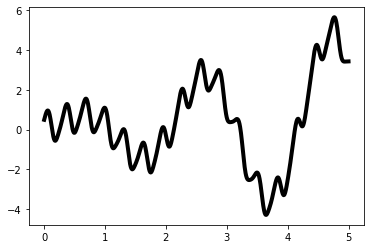

In [ ]:
plt.plot(x, tofit, c='k', lw=4, label='Data')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

data=x.reshape(N,1)
labels=tofit.reshape(N,1)

X=data
N=X.shape[0]
D=X.shape[1]
H1=5
H2=5 #number of hidden nurons
H3=5 #number of hidden nurons          ######### this was 1
H4=5
H5=1


num_steps = 100000
alpha = .001
lamda=0.001                 # lamda # lamda # lamda   # lamda   # lamda   # lamda


#np.random.seed(s)

# First, initialize our neural network parameters.
params = {}
params['W_1'] = np.random.randn(H1, D)
params['b_1'] = np.zeros([1,H1])
params['W_2'] = np.random.randn(H2, H1)
params['b_2'] = np.zeros([1,H2])

params['W_3'] = np.random.randn(H3, H2)
params['b_3'] = np.zeros([1,H3])
params['W_4'] = np.random.randn(H4, H3)
params['b_4'] = np.zeros([1,H4])
params['W_5'] = np.random.randn(H5, H4)
params['b_5'] = np.zeros([1,H5])

epoch   0 | Loss 542.44
epoch 10000 | Loss 2.32
epoch 20000 | Loss 2.07
epoch 30000 | Loss 1.84
epoch 40000 | Loss 1.33
epoch 50000 | Loss 1.10
epoch 60000 | Loss 0.56
epoch 70000 | Loss 0.25
epoch 80000 | Loss 0.19
epoch 90000 | Loss 0.18


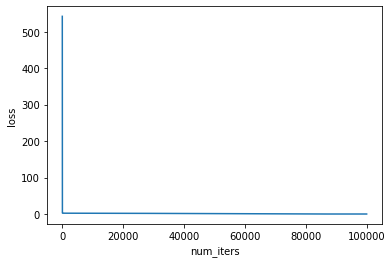

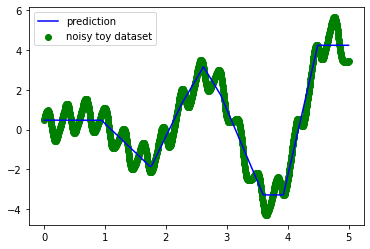

In [ ]:
def Relu(x):
    return x * (x > 0)

# Notice we make use of numpy's broadcasting when adding the bias b.
# this function is designed for testing tuned
def forward_reg(X, params):    
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4'])
    H_4 = Relu(z_4)

    y = np.dot(H_4, params['W_5'].T) +  np.dot(np.ones([N,1]),params['b_5'])
##################################
    return y

def LogisticCrossEntropyLoss (N,t,z):
  return (1./N) * np.sum(t * np.log(1+np.exp(-z)) - (1 - t) * np.log(1 +np.exp(z)))

def CrossEntropyLoss (N,t,y):
  return (1./N) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
##################################################################################
def LeastSquaresLoss (N,t,y):
  return (1/(2*N))*np.dot((y-t).T,(y-t))

def loss_ridge (N,t,y,w1,w2,w3,w4,w5,lamda):    # CHANGE MADE HERE  CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE
  return (((1/(2*N))*np.dot((y-t).T,(y-t))) + ((lamda/(2*N)) * (np.dot(w1.T,w1)[0,0]+np.dot(w2.T,w2)[0,0]+np.dot(w3.T,w3)[0,0]+np.dot(w4.T,w4)[0,0]+np.dot(w5.T,w5)[0,0])))
##################################################################################
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

def dRelu(x):
    return 1. * (x > 0)

def backprop_reg(X, t, params, lamda):

    N = X.shape[0] # already defined

    # Perform forwards computation.
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4'])
    H_4 = Relu(z_4)

    y = np.dot(H_4, params['W_5'].T) +  np.dot(np.ones([N,1]),params['b_5'])
##################################
    #loss = LeastSquaresLoss(N,t,y)  
    loss = loss_ridge (N,t,y,params['W_1'],params['W_2'],params['W_3'],params['W_4'],params['W_5'],lamda)                ### CHANGE MADE HERE CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE

##################################

    # Perform backwards computation. # over all training egs.
    E_bar = 1
    y_bar = (1./N) * (y - t)
    W_5_bar = np.dot(y_bar.T, H_4) + (lamda/(N))* params['W_5']  # 
    b_5_bar = np.dot(np.ones([1,N]),y_bar)
    H_4_bar = np.dot(y_bar, params['W_5'])   #####    500,1   1,3

    #

    z_4_bar = H_4_bar * dRelu(z_4)
    W_4_bar = np.dot(z_4_bar.T,H_3) + (lamda/(N))* params['W_4'] 
    b_4_bar = np.dot(np.ones([1,N]),z_4_bar)
    H_3_bar = np.dot(z_4_bar, params['W_4']) 

    #

    z_3_bar = H_3_bar * dRelu(z_3)
    W_3_bar = np.dot(z_3_bar.T,H_2) + (lamda/(N))* params['W_3'] 
    b_3_bar = np.dot(np.ones([1,N]),z_3_bar)
    H_2_bar = np.dot(z_3_bar, params['W_3']) 

    #

    z_2_bar = H_2_bar * dRelu(z_2)
    W_2_bar = np.dot(z_2_bar.T,H_1) + (lamda/(N))* params['W_2'] 
    b_2_bar = np.dot(np.ones([1,N]),z_2_bar)
    H_1_bar = np.dot(z_2_bar, params['W_2']) 

    #

    z_1_bar = H_1_bar * dRelu(z_1)
    W_1_bar = np.dot(z_1_bar.T, X) + (lamda/(N))* params['W_1'] 
    b_1_bar = np.dot(np.ones([1,N]),z_1_bar)


    # Wrap our gradients in a dictionary. 
    grads = {}
    grads['W_1'] = W_1_bar
    grads['b_1'] = b_1_bar
    grads['W_2'] = W_2_bar
    grads['b_2'] = b_2_bar
    grads['W_3'] = W_3_bar
    grads['b_3'] = b_3_bar
    grads['W_4'] = W_4_bar
    grads['b_4'] = b_4_bar
    grads['W_5'] = W_5_bar
    grads['b_5'] = b_5_bar

    return grads, loss



lastloss=10000000000
yyy=[]
xxx=[]
for step in range(num_steps):        
    grads, loss = backprop_reg(data, labels, params,lamda) # passing inital params
    yyy.append(loss[0,0])
    xxx.append(step)
    for k in params:
        params[k] -= alpha * grads[k]
    # Print loss every so often.
    if step % 10000 == 0:
        print("epoch {:3d} | Loss {:3.2f}".format(step, loss[0,0]))
        if lastloss-loss[0,0] <=0.0001:
          #break
          print('converged to a delta <=0.0001')
        lastloss=loss[0,0]
plt.figure(1)
plt.plot(xxx,yyy)
plt.xlabel('num_iters')
plt.ylabel("loss")

num_points = N

x1s = np.linspace(0, 5, N)

points = x1s.reshape(N,1)
Y = forward_reg(points, params)
plt.figure(2)
plt.plot(x1s, Y, c='b', label='prediction')
plt.scatter(x,tofit,label='noisy toy dataset',c='g')
plt.legend()

## Now implement a skip connection from the MLP-3 output to the final ALC in the MLP-5. Retrain this and note the characteristics of training.

### Regularized MLP-5 W/ bypass

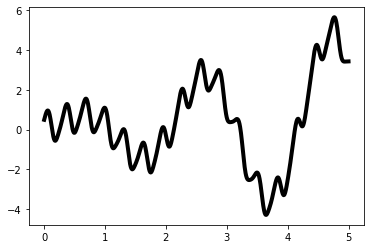

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


plt.plot(x, tofit, c='k', lw=4, label='Data')

plt.show()

data=x.reshape(N,1)
labels=tofit.reshape(N,1)

X=data
N=X.shape[0]
D=X.shape[1]
H1=5
H2=5 #number of hidden nurons
H3=5 #number of hidden nurons          ######### this was 1
H4=5
H5=1


num_steps = 100000
alpha = .001
lamda=0.001                 # lamda # lamda # lamda   # lamda   # lamda   # lamda


#np.random.seed(s)

# First, initialize our neural network parameters.
params = {}
params['W_1'] = np.random.randn(H1, D)
params['b_1'] = np.zeros([1,H1])
params['W_2'] = np.random.randn(H2, H1)
params['b_2'] = np.zeros([1,H2])

params['W_3'] = np.random.randn(H3, H2)
params['b_3'] = np.zeros([1,H3])
params['W_4'] = np.random.randn(H4, H3)
params['b_4'] = np.zeros([1,H4])
params['W_5'] = np.random.randn(H5, H4)
params['b_5'] = np.zeros([1,H5])

epoch   0 | Loss 129.68
epoch 10000 | Loss 1.08
epoch 20000 | Loss 0.35
epoch 30000 | Loss 0.27
epoch 40000 | Loss 0.23
epoch 50000 | Loss 0.20
epoch 60000 | Loss 0.18
epoch 70000 | Loss 0.17
epoch 80000 | Loss 0.16
epoch 90000 | Loss 0.15


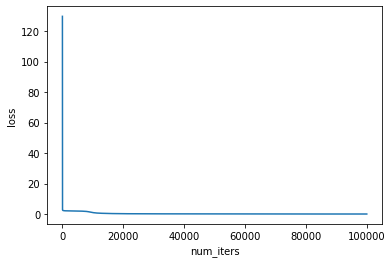

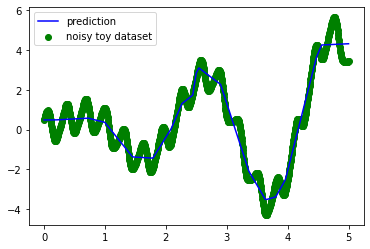

In [ ]:
def Relu(x):
    return x * (x > 0)

# Notice we make use of numpy's broadcasting when adding the bias b.
# this function is designed for testing tuned
def forward_reg(X, params):    
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4']) + H_2 # adding bypass         CHANGE MADE HERE     CHANGE MADE HERE     CHANGE MADE HERE
    H_4 = Relu(z_4)

    y = np.dot(H_4, params['W_5'].T) +  np.dot(np.ones([N,1]),params['b_5'])
##################################
    return y

def LogisticCrossEntropyLoss (N,t,z):
  return (1./N) * np.sum(t * np.log(1+np.exp(-z)) - (1 - t) * np.log(1 +np.exp(z)))

def CrossEntropyLoss (N,t,y):
  return (1./N) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
##################################################################################
def LeastSquaresLoss (N,t,y):
  return (1/(2*N))*np.dot((y-t).T,(y-t))

def loss_ridge (N,t,y,w1,w2,w3,w4,w5,lamda):    # CHANGE MADE HERE  CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE
  return (((1/(2*N))*np.dot((y-t).T,(y-t))) + ((lamda/(2*N)) * (np.dot(w1.T,w1)[0,0]+np.dot(w2.T,w2)[0,0]+np.dot(w3.T,w3)[0,0]+np.dot(w4.T,w4)[0,0]+np.dot(w5.T,w5)[0,0])))
##################################################################################
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

def dRelu(x):
    return 1. * (x > 0)

def backprop_reg(X, t, params, lamda):

    N = X.shape[0] # already defined

    # Perform forwards computation.
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4']) + H_2 # adding bypass            CHANGE MADE HERE   CHANGE MADE HERE      CHANGE MADE HERE      CHANGE MADE HERE
    H_4 = Relu(z_4)

    y = np.dot(H_4, params['W_5'].T) +  np.dot(np.ones([N,1]),params['b_5'])
##################################
    #loss = LeastSquaresLoss(N,t,y)  
    loss = loss_ridge (N,t,y,params['W_1'],params['W_2'],params['W_3'],params['W_4'],params['W_5'],lamda)

##################################

    # Perform backwards computation. # over all training egs.
    E_bar = 1
    y_bar = (1./N) * (y - t)
    W_5_bar = np.dot(y_bar.T, H_4) + (lamda/(N))* params['W_5']  # 
    b_5_bar = np.dot(np.ones([1,N]),y_bar)
    H_4_bar = np.dot(y_bar, params['W_5'])   #####    500,1   1,3

    #

    z_4_bar = H_4_bar * dRelu(z_4)
    W_4_bar = np.dot(z_4_bar.T,H_3) + (lamda/(N))* params['W_4'] 
    b_4_bar = np.dot(np.ones([1,N]),z_4_bar)
    H_3_bar = np.dot(z_4_bar, params['W_4']) 

    #

    z_3_bar = H_3_bar * dRelu(z_3)
    W_3_bar = np.dot(z_3_bar.T,H_2) + (lamda/(N))* params['W_3'] 
    b_3_bar = np.dot(np.ones([1,N]),z_3_bar)
    H_2_bar = np.dot(z_3_bar, params['W_3']) +  z_4_bar#    CHANGE MADE HERE     CHANGE MADE HERE      CHANGE MADE HERE        CHANGE MADE HERE

    #

    z_2_bar = H_2_bar * dRelu(z_2)
    W_2_bar = np.dot(z_2_bar.T,H_1) + (lamda/(N))* params['W_2'] 
    b_2_bar = np.dot(np.ones([1,N]),z_2_bar)
    H_1_bar = np.dot(z_2_bar, params['W_2']) 

    #

    z_1_bar = H_1_bar * dRelu(z_1)
    W_1_bar = np.dot(z_1_bar.T, X) + (lamda/(N))* params['W_1'] 
    b_1_bar = np.dot(np.ones([1,N]),z_1_bar)


    # Wrap our gradients in a dictionary. 
    grads = {}
    grads['W_1'] = W_1_bar
    grads['b_1'] = b_1_bar
    grads['W_2'] = W_2_bar
    grads['b_2'] = b_2_bar
    grads['W_3'] = W_3_bar
    grads['b_3'] = b_3_bar
    grads['W_4'] = W_4_bar
    grads['b_4'] = b_4_bar
    grads['W_5'] = W_5_bar
    grads['b_5'] = b_5_bar

    return grads, loss



lastloss=10000000000
yyy=[]
xxx=[]
for step in range(num_steps):        
    grads, loss = backprop_reg(data, labels, params,lamda) # passing inital params
    yyy.append(loss[0,0])
    xxx.append(step)
    for k in params:
        params[k] -= alpha * grads[k]
    # Print loss every so often.
    if step % 10000 == 0:
        print("epoch {:3d} | Loss {:3.2f}".format(step, loss[0,0]))
        if lastloss-loss[0,0] <=0.0001:
          #break
          print('converged to a delta <=0.0001')
        lastloss=loss[0,0]
plt.figure(1)
plt.plot(xxx,yyy)
plt.xlabel('num_iters')
plt.ylabel("loss")

num_points = N

x1s = np.linspace(0, 5, N)

points = x1s.reshape(N,1)
Y = forward_reg(points, params)
plt.figure(2)
plt.plot(x1s, Y, c='b', label='prediction')
plt.scatter(x,tofit,label='noisy toy dataset',c='g')
plt.legend()

# Dataset 2

the data

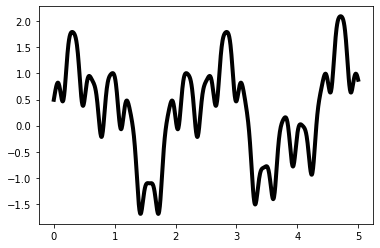

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

s=2564738
np.random.seed(seed=s)

N=1000

'''x = np.linspace(0, 5, N)
tofit = np.sin(3 * x)*x + .6 * np.sin(20*x) - .5 * np.cos(3 * np.cos(10 * x))
plt.plot(x, tofit, c='k', lw=4, label='Data')'''


x = np.linspace(0, 5, N)
tofit = np.sin(3 * x) + .6 * np.sin(7*x) - .5 * np.cos(3 * np.cos(10 * x))
plt.plot(x, tofit, c='k', lw=4, label='Data')

## Take a simple MLP-3 that you have developed in a prior assignment. Add two additional layers to this MLP-3 and train the resulting MLP-5. Note the characteristics of the training process (number of iterations, error per iteration).

### Un-Regularized MLP-5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

data=x.reshape(N,1)
labels=tofit.reshape(N,1)

X=data
N=X.shape[0]
D=X.shape[1]
H1=5
H2=5 #number of hidden nurons
H3=5 #number of hidden nurons          ######### this was 1
H4=5
H5=1

num_steps = 100000
alpha = .001
#lamda=0.001


# First, initialize our neural network parameters.
params = {}
params['W_1'] = np.random.randn(H1, D)
params['b_1'] = np.zeros([1,H1])
params['W_2'] = np.random.randn(H2, H1)
params['b_2'] = np.zeros([1,H2])

params['W_3'] = np.random.randn(H3, H2)
params['b_3'] = np.zeros([1,H3])
params['W_4'] = np.random.randn(H4, H3)
params['b_4'] = np.zeros([1,H4])
params['W_5'] = np.random.randn(H5, H4)
params['b_5'] = np.zeros([1,H5])

epoch   0 | Loss 59.73
epoch 10000 | Loss 0.39
epoch 20000 | Loss 0.34
epoch 30000 | Loss 0.29
epoch 40000 | Loss 0.19
epoch 50000 | Loss 0.13
epoch 60000 | Loss 0.12
epoch 70000 | Loss 0.11
epoch 80000 | Loss 0.11
epoch 90000 | Loss 0.11


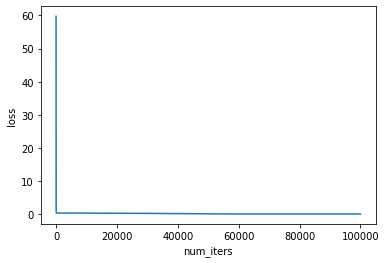

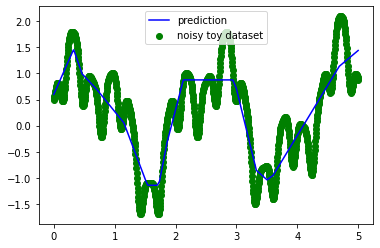

In [ ]:
def Relu(x):
    return x * (x > 0)

# Notice we make use of numpy's broadcasting when adding the bias b.
# this function is designed for testing tuned
def forward_reg(X, params):    
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4'])
    H_4 = Relu(z_4)

    y = np.dot(H_4, params['W_5'].T) +  np.dot(np.ones([N,1]),params['b_5'])
##################################
    return y

def LogisticCrossEntropyLoss (N,t,z):
  return (1./N) * np.sum(t * np.log(1+np.exp(-z)) - (1 - t) * np.log(1 +np.exp(z)))

def CrossEntropyLoss (N,t,y):
  return (1./N) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
##################################################################################
def LeastSquaresLoss (N,t,y):
  return (1/(2*N))*np.dot((y-t).T,(y-t))

def loss_ridge (N,t,y,w1,w2,w3,w4,w5,lamda):    # CHANGE MADE HERE  CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE
  return (((1/(2*N))*np.dot((y-t).T,(y-t))) + ((lamda/(2*N)) * (np.dot(w1.T,w1)[0,0]+np.dot(w2.T,w2)[0,0]+np.dot(w3.T,w3)[0,0]+np.dot(w4.T,w4)[0,0]+np.dot(w5.T,w5)[0,0])))
##################################################################################
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

def dRelu(x):
    return 1. * (x > 0)

def backprop_reg(X, t, params):

    N = X.shape[0] # already defined

    # Perform forwards computation.
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4'])
    H_4 = Relu(z_4)

    y = np.dot(H_4, params['W_5'].T) +  np.dot(np.ones([N,1]),params['b_5'])
##################################
    loss = LeastSquaresLoss(N,t,y)  
    #loss = loss_ridge (N,t,y,params['W_1'],params['W_2'],params['W_3'],params['W_4'],params['W_5'],lamda)                ### CHANGE MADE HERE CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE

##################################

    # Perform backwards computation. # over all training egs.
    E_bar = 1
    y_bar = (1./N) * (y - t)
    W_5_bar = np.dot(y_bar.T, H_4) #+ (lamda/(N))* params['W_5']  # 
    b_5_bar = np.dot(np.ones([1,N]),y_bar)
    H_4_bar = np.dot(y_bar, params['W_5'])   #####    500,1   1,3

    #

    z_4_bar = H_4_bar * dRelu(z_4)
    W_4_bar = np.dot(z_4_bar.T,H_3) #+ (lamda/(N))* params['W_4'] 
    b_4_bar = np.dot(np.ones([1,N]),z_4_bar)
    H_3_bar = np.dot(z_4_bar, params['W_4']) 

    #

    z_3_bar = H_3_bar * dRelu(z_3)
    W_3_bar = np.dot(z_3_bar.T,H_2) #+ (lamda/(N))* params['W_3'] 
    b_3_bar = np.dot(np.ones([1,N]),z_3_bar)
    H_2_bar = np.dot(z_3_bar, params['W_3']) 

    #

    z_2_bar = H_2_bar * dRelu(z_2)
    W_2_bar = np.dot(z_2_bar.T,H_1) #+ (lamda/(N))* params['W_2'] 
    b_2_bar = np.dot(np.ones([1,N]),z_2_bar)
    H_1_bar = np.dot(z_2_bar, params['W_2']) 

    #

    z_1_bar = H_1_bar * dRelu(z_1)
    W_1_bar = np.dot(z_1_bar.T, X) #+ (lamda/(N))* params['W_1'] 
    b_1_bar = np.dot(np.ones([1,N]),z_1_bar)


    # Wrap our gradients in a dictionary. 
    grads = {}
    grads['W_1'] = W_1_bar
    grads['b_1'] = b_1_bar
    grads['W_2'] = W_2_bar
    grads['b_2'] = b_2_bar
    grads['W_3'] = W_3_bar
    grads['b_3'] = b_3_bar
    grads['W_4'] = W_4_bar
    grads['b_4'] = b_4_bar
    grads['W_5'] = W_5_bar
    grads['b_5'] = b_5_bar

    return grads, loss



lastloss=10000000000
yyy=[]
xxx=[]
for step in range(num_steps):        
    grads, loss = backprop_reg(data, labels, params) # passing inital params
    yyy.append(loss[0,0])
    xxx.append(step)
    for k in params:
        params[k] -= alpha * grads[k]
    # Print loss every so often.
    if step % 10000 == 0:
        print("epoch {:3d} | Loss {:3.2f}".format(step, loss[0,0]))
        if lastloss-loss[0,0] <=0.0001:
          #break
          print('converged to a delta <=0.0001')
        lastloss=loss[0,0]
plt.figure(1)
plt.plot(xxx,yyy)
plt.xlabel('num_iters')
plt.ylabel("loss")

num_points = N

x1s = np.linspace(0, 5, N)

points = x1s.reshape(N,1)
Y = forward_reg(points, params)
plt.figure(2)
plt.plot(x1s, Y, c='b', label='prediction')
plt.scatter(x,tofit,label='noisy toy dataset',c='g')
plt.legend()

### Regularized MLP-5

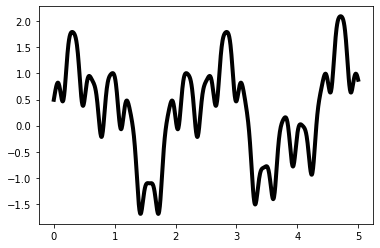

In [ ]:
plt.plot(x, tofit, c='k', lw=4, label='Data')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

data=x.reshape(N,1)
labels=tofit.reshape(N,1)

X=data
N=X.shape[0]
D=X.shape[1]
H1=5
H2=5 #number of hidden nurons
H3=5 #number of hidden nurons          ######### this was 1
H4=5
H5=1


num_steps = 100000
alpha = .001
lamda=0.001                 # lamda # lamda # lamda   # lamda   # lamda   # lamda


#np.random.seed(s)

# First, initialize our neural network parameters.
params = {}
params['W_1'] = np.random.randn(H1, D)
params['b_1'] = np.zeros([1,H1])
params['W_2'] = np.random.randn(H2, H1)
params['b_2'] = np.zeros([1,H2])

params['W_3'] = np.random.randn(H3, H2)
params['b_3'] = np.zeros([1,H3])
params['W_4'] = np.random.randn(H4, H3)
params['b_4'] = np.zeros([1,H4])
params['W_5'] = np.random.randn(H5, H4)
params['b_5'] = np.zeros([1,H5])

epoch   0 | Loss 552.24
epoch 10000 | Loss 0.41
epoch 20000 | Loss 0.40
epoch 30000 | Loss 0.33
epoch 40000 | Loss 0.30
epoch 50000 | Loss 0.28
epoch 60000 | Loss 0.28
epoch 70000 | Loss 0.28
epoch 80000 | Loss 0.28
epoch 90000 | Loss 0.27


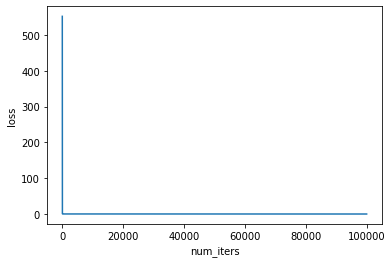

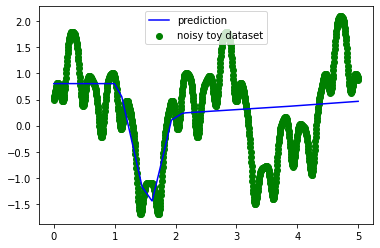

In [ ]:
def Relu(x):
    return x * (x > 0)

# Notice we make use of numpy's broadcasting when adding the bias b.
# this function is designed for testing tuned
def forward_reg(X, params):    
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4'])
    H_4 = Relu(z_4)

    y = np.dot(H_4, params['W_5'].T) +  np.dot(np.ones([N,1]),params['b_5'])
##################################
    return y

def LogisticCrossEntropyLoss (N,t,z):
  return (1./N) * np.sum(t * np.log(1+np.exp(-z)) - (1 - t) * np.log(1 +np.exp(z)))

def CrossEntropyLoss (N,t,y):
  return (1./N) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
##################################################################################
def LeastSquaresLoss (N,t,y):
  return (1/(2*N))*np.dot((y-t).T,(y-t))

def loss_ridge (N,t,y,w1,w2,w3,w4,w5,lamda):    # CHANGE MADE HERE  CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE
  return (((1/(2*N))*np.dot((y-t).T,(y-t))) + ((lamda/(2*N)) * (np.dot(w1.T,w1)[0,0]+np.dot(w2.T,w2)[0,0]+np.dot(w3.T,w3)[0,0]+np.dot(w4.T,w4)[0,0]+np.dot(w5.T,w5)[0,0])))
##################################################################################
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

def dRelu(x):
    return 1. * (x > 0)

def backprop_reg(X, t, params, lamda):

    N = X.shape[0] # already defined

    # Perform forwards computation.
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4'])
    H_4 = Relu(z_4)

    y = np.dot(H_4, params['W_5'].T) +  np.dot(np.ones([N,1]),params['b_5'])
##################################
    #loss = LeastSquaresLoss(N,t,y)  
    loss = loss_ridge (N,t,y,params['W_1'],params['W_2'],params['W_3'],params['W_4'],params['W_5'],lamda)                ### CHANGE MADE HERE CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE

##################################

    # Perform backwards computation. # over all training egs.
    E_bar = 1
    y_bar = (1./N) * (y - t)
    W_5_bar = np.dot(y_bar.T, H_4) + (lamda/(N))* params['W_5']  # 
    b_5_bar = np.dot(np.ones([1,N]),y_bar)
    H_4_bar = np.dot(y_bar, params['W_5'])   #####    500,1   1,3

    #

    z_4_bar = H_4_bar * dRelu(z_4)
    W_4_bar = np.dot(z_4_bar.T,H_3) + (lamda/(N))* params['W_4'] 
    b_4_bar = np.dot(np.ones([1,N]),z_4_bar)
    H_3_bar = np.dot(z_4_bar, params['W_4']) 

    #

    z_3_bar = H_3_bar * dRelu(z_3)
    W_3_bar = np.dot(z_3_bar.T,H_2) + (lamda/(N))* params['W_3'] 
    b_3_bar = np.dot(np.ones([1,N]),z_3_bar)
    H_2_bar = np.dot(z_3_bar, params['W_3']) 

    #

    z_2_bar = H_2_bar * dRelu(z_2)
    W_2_bar = np.dot(z_2_bar.T,H_1) + (lamda/(N))* params['W_2'] 
    b_2_bar = np.dot(np.ones([1,N]),z_2_bar)
    H_1_bar = np.dot(z_2_bar, params['W_2']) 

    #

    z_1_bar = H_1_bar * dRelu(z_1)
    W_1_bar = np.dot(z_1_bar.T, X) + (lamda/(N))* params['W_1'] 
    b_1_bar = np.dot(np.ones([1,N]),z_1_bar)


    # Wrap our gradients in a dictionary. 
    grads = {}
    grads['W_1'] = W_1_bar
    grads['b_1'] = b_1_bar
    grads['W_2'] = W_2_bar
    grads['b_2'] = b_2_bar
    grads['W_3'] = W_3_bar
    grads['b_3'] = b_3_bar
    grads['W_4'] = W_4_bar
    grads['b_4'] = b_4_bar
    grads['W_5'] = W_5_bar
    grads['b_5'] = b_5_bar

    return grads, loss



lastloss=10000000000
yyy=[]
xxx=[]
for step in range(num_steps):        
    grads, loss = backprop_reg(data, labels, params,lamda) # passing inital params
    yyy.append(loss[0,0])
    xxx.append(step)
    for k in params:
        params[k] -= alpha * grads[k]
    # Print loss every so often.
    if step % 10000 == 0:
        print("epoch {:3d} | Loss {:3.2f}".format(step, loss[0,0]))
        if lastloss-loss[0,0] <=0.0001:
          #break
          print('converged to a delta <=0.0001')
        lastloss=loss[0,0]
plt.figure(1)
plt.plot(xxx,yyy)
plt.xlabel('num_iters')
plt.ylabel("loss")

num_points = N

x1s = np.linspace(0, 5, N)

points = x1s.reshape(N,1)
Y = forward_reg(points, params)
plt.figure(2)
plt.plot(x1s, Y, c='b', label='prediction')
plt.scatter(x,tofit,label='noisy toy dataset',c='g')
plt.legend()

## Now implement a skip connection from the MLP-3 output to the final ALC in the MLP-5. Retrain this and note the characteristics of training.

### Regularized MLP-5 W/ bypass

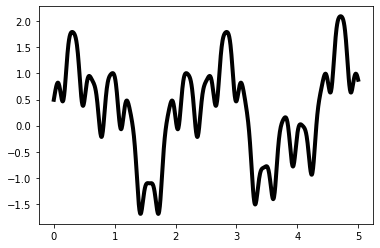

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


plt.plot(x, tofit, c='k', lw=4, label='Data')

plt.show()

data=x.reshape(N,1)
labels=tofit.reshape(N,1)

X=data
N=X.shape[0]
D=X.shape[1]
H1=5
H2=5 #number of hidden nurons
H3=5 #number of hidden nurons          ######### this was 1
H4=5
H5=1


num_steps = 100000
alpha = .001
lamda=0.001                 # lamda # lamda # lamda   # lamda   # lamda   # lamda


#np.random.seed(s)

# First, initialize our neural network parameters.
params = {}
params['W_1'] = np.random.randn(H1, D)
params['b_1'] = np.zeros([1,H1])
params['W_2'] = np.random.randn(H2, H1)
params['b_2'] = np.zeros([1,H2])

params['W_3'] = np.random.randn(H3, H2)
params['b_3'] = np.zeros([1,H3])
params['W_4'] = np.random.randn(H4, H3)
params['b_4'] = np.zeros([1,H4])
params['W_5'] = np.random.randn(H5, H4)
params['b_5'] = np.zeros([1,H5])

epoch   0 | Loss 122.24
epoch 10000 | Loss 0.31
epoch 20000 | Loss 0.28
epoch 30000 | Loss 0.27
epoch 40000 | Loss 0.26
epoch 50000 | Loss 0.26
epoch 60000 | Loss 0.24
epoch 70000 | Loss 0.19
epoch 80000 | Loss 0.15
epoch 90000 | Loss 0.14


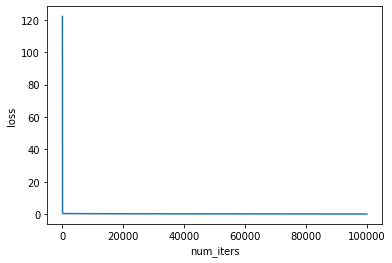

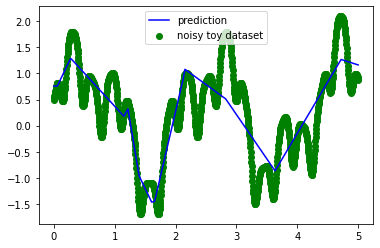

In [ ]:
def Relu(x):
    return x * (x > 0)

# Notice we make use of numpy's broadcasting when adding the bias b.
# this function is designed for testing tuned
def forward_reg(X, params):    
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4']) + H_2 # adding bypass         CHANGE MADE HERE     CHANGE MADE HERE     CHANGE MADE HERE
    H_4 = Relu(z_4)

    y = np.dot(H_4, params['W_5'].T) +  np.dot(np.ones([N,1]),params['b_5'])
##################################
    return y

def LogisticCrossEntropyLoss (N,t,z):
  return (1./N) * np.sum(t * np.log(1+np.exp(-z)) - (1 - t) * np.log(1 +np.exp(z)))

def CrossEntropyLoss (N,t,y):
  return (1./N) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
##################################################################################
def LeastSquaresLoss (N,t,y):
  return (1/(2*N))*np.dot((y-t).T,(y-t))

def loss_ridge (N,t,y,w1,w2,w3,w4,w5,lamda):    # CHANGE MADE HERE  CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE
  return (((1/(2*N))*np.dot((y-t).T,(y-t))) + ((lamda/(2*N)) * (np.dot(w1.T,w1)[0,0]+np.dot(w2.T,w2)[0,0]+np.dot(w3.T,w3)[0,0]+np.dot(w4.T,w4)[0,0]+np.dot(w5.T,w5)[0,0])))
##################################################################################
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

def dRelu(x):
    return 1. * (x > 0)

def backprop_reg(X, t, params, lamda):

    N = X.shape[0] # already defined

    # Perform forwards computation.
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4']) + H_2 # adding bypass            CHANGE MADE HERE   CHANGE MADE HERE      CHANGE MADE HERE      CHANGE MADE HERE
    H_4 = Relu(z_4)

    y = np.dot(H_4, params['W_5'].T) +  np.dot(np.ones([N,1]),params['b_5'])
##################################
    #loss = LeastSquaresLoss(N,t,y)  
    loss = loss_ridge (N,t,y,params['W_1'],params['W_2'],params['W_3'],params['W_4'],params['W_5'],lamda)

##################################

    # Perform backwards computation. # over all training egs.
    E_bar = 1
    y_bar = (1./N) * (y - t)
    W_5_bar = np.dot(y_bar.T, H_4) + (lamda/(N))* params['W_5']  # 
    b_5_bar = np.dot(np.ones([1,N]),y_bar)
    H_4_bar = np.dot(y_bar, params['W_5'])   #####    500,1   1,3

    #

    z_4_bar = H_4_bar * dRelu(z_4)
    W_4_bar = np.dot(z_4_bar.T,H_3) + (lamda/(N))* params['W_4'] 
    b_4_bar = np.dot(np.ones([1,N]),z_4_bar)
    H_3_bar = np.dot(z_4_bar, params['W_4']) 

    #

    z_3_bar = H_3_bar * dRelu(z_3)
    W_3_bar = np.dot(z_3_bar.T,H_2) + (lamda/(N))* params['W_3'] 
    b_3_bar = np.dot(np.ones([1,N]),z_3_bar)
    H_2_bar = np.dot(z_3_bar, params['W_3']) +  z_4_bar#    CHANGE MADE HERE     CHANGE MADE HERE      CHANGE MADE HERE        CHANGE MADE HERE

    #

    z_2_bar = H_2_bar * dRelu(z_2)
    W_2_bar = np.dot(z_2_bar.T,H_1) + (lamda/(N))* params['W_2'] 
    b_2_bar = np.dot(np.ones([1,N]),z_2_bar)
    H_1_bar = np.dot(z_2_bar, params['W_2']) 

    #

    z_1_bar = H_1_bar * dRelu(z_1)
    W_1_bar = np.dot(z_1_bar.T, X) + (lamda/(N))* params['W_1'] 
    b_1_bar = np.dot(np.ones([1,N]),z_1_bar)


    # Wrap our gradients in a dictionary. 
    grads = {}
    grads['W_1'] = W_1_bar
    grads['b_1'] = b_1_bar
    grads['W_2'] = W_2_bar
    grads['b_2'] = b_2_bar
    grads['W_3'] = W_3_bar
    grads['b_3'] = b_3_bar
    grads['W_4'] = W_4_bar
    grads['b_4'] = b_4_bar
    grads['W_5'] = W_5_bar
    grads['b_5'] = b_5_bar

    return grads, loss



lastloss=10000000000
yyy=[]
xxx=[]
for step in range(num_steps):        
    grads, loss = backprop_reg(data, labels, params,lamda) # passing inital params
    yyy.append(loss[0,0])
    xxx.append(step)
    for k in params:
        params[k] -= alpha * grads[k]
    # Print loss every so often.
    if step % 10000 == 0:
        print("epoch {:3d} | Loss {:3.2f}".format(step, loss[0,0]))
        if lastloss-loss[0,0] <=0.0001:
          #break
          print('converged to a delta <=0.0001')
        lastloss=loss[0,0]
plt.figure(1)
plt.plot(xxx,yyy)
plt.xlabel('num_iters')
plt.ylabel("loss")

num_points = N

x1s = np.linspace(0, 5, N)

points = x1s.reshape(N,1)
Y = forward_reg(points, params)
plt.figure(2)
plt.plot(x1s, Y, c='b', label='prediction')
plt.scatter(x,tofit,label='noisy toy dataset',c='g')
plt.legend()

MLP-5, H=5 in all except last layer where H=1 (regression), Relu activation for all:
- Unregularized, Loss 0.11
- Regularized, Loss 0.27
- Regularized ByPassLoss 0.14

To be discussed further at the end of the notebook.

## Perform this activity twice more (MLP-7, and then MLP-9) noting the above.

Report the training traces, and comment on what you see.

In [ ]:
s=25647381
np.random.seed(seed=s)

### Un-Regularized MLP-7

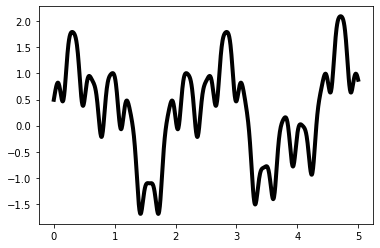

In [ ]:
plt.plot(x, tofit, c='k', lw=4, label='Data')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

data=x.reshape(N,1)
labels=tofit.reshape(N,1)

X=data
N=X.shape[0]
D=X.shape[1]
H1=5
H2=5 #number of hidden nurons
H3=5 #number of hidden nurons          ######### this was 1
H4=5
H5=5
H6=5
H7=1


num_steps = 100000
alpha = .001
lamda=0.001                 # lamda # lamda # lamda   # lamda   # lamda   # lamda


#np.random.seed(s)

# First, initialize our neural network parameters.
params = {}
params['W_1'] = np.random.randn(H1, D)
params['b_1'] = np.zeros([1,H1])
params['W_2'] = np.random.randn(H2, H1)
params['b_2'] = np.zeros([1,H2])

params['W_3'] = np.random.randn(H3, H2)
params['b_3'] = np.zeros([1,H3])
params['W_4'] = np.random.randn(H4, H3)
params['b_4'] = np.zeros([1,H4])


params['W_5'] = np.random.randn(H5, H4)
params['b_5'] = np.zeros([1,H5])
params['W_6'] = np.random.randn(H6, H5)
params['b_6'] = np.zeros([1,H6])

params['W_7'] = np.random.randn(H7, H6)
params['b_7'] = np.zeros([1,H7])

epoch   0 | Loss 0.95
epoch 10000 | Loss 0.30
epoch 20000 | Loss 0.29
epoch 30000 | Loss 0.27
epoch 40000 | Loss 0.26
epoch 50000 | Loss 0.26
epoch 60000 | Loss 0.25
epoch 70000 | Loss 0.25
epoch 80000 | Loss 0.25
epoch 90000 | Loss 0.25


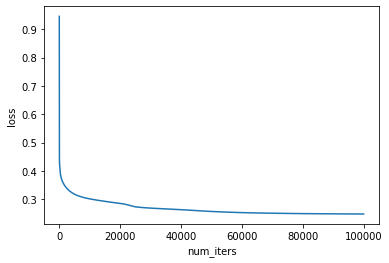

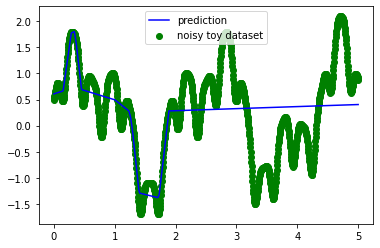

In [ ]:
def Relu(x):
    return x * (x > 0)

# Notice we make use of numpy's broadcasting when adding the bias b.
# this function is designed for testing tuned
def forward_reg(X, params):    
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4'])
    H_4 = Relu(z_4)

    z_5 = np.dot(H_4, params['W_5'].T) + np.dot(np.ones([N,1]),params['b_5'])
    H_5 = Relu(z_5)

    z_6 = np.dot(H_5, params['W_6'].T) + np.dot(np.ones([N,1]),params['b_6'])
    H_6 = Relu(z_6)

    y = np.dot(H_6, params['W_7'].T) +  np.dot(np.ones([N,1]),params['b_7'])
##################################
    return y

def LogisticCrossEntropyLoss (N,t,z):
  return (1./N) * np.sum(t * np.log(1+np.exp(-z)) - (1 - t) * np.log(1 +np.exp(z)))

def CrossEntropyLoss (N,t,y):
  return (1./N) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
##################################################################################
def LeastSquaresLoss (N,t,y):
  return (1/(2*N))*np.dot((y-t).T,(y-t))

#def loss_ridge (N,t,y,w1,w2,w3,w4,w5,w6,w7,lamda):    # CHANGE MADE HERE  CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE
#  return (((1/(2*N))*np.dot((y-t).T,(y-t))) + ((lamda/(2*N)) * (np.dot(w1.T,w1)[0,0]+np.dot(w2.T,w2)[0,0]+np.dot(w3.T,w3)[0,0]+np.dot(w4.T,w4)[0,0]+np.dot(w5.T,w5)[0,0]+np.dot(w6.T,w6)[0,0]+np.dot(w7.T,w7)[0,0])))
##################################################################################
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

def dRelu(x):
    return 1. * (x > 0)

def backprop_reg(X, t, params, lamda):

    N = X.shape[0] # already defined

    # Perform forwards computation.
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4'])
    H_4 = Relu(z_4)

    z_5 = np.dot(H_4, params['W_5'].T) + np.dot(np.ones([N,1]),params['b_5'])
    H_5 = Relu(z_5)

    z_6 = np.dot(H_5, params['W_6'].T) + np.dot(np.ones([N,1]),params['b_6'])
    H_6 = Relu(z_6)

    y = np.dot(H_6, params['W_7'].T) +  np.dot(np.ones([N,1]),params['b_7'])
##################################
    loss = LeastSquaresLoss(N,t,y)  
    #loss = loss_ridge (N,t,y,params['W_1'],params['W_2'],params['W_3'],params['W_4'],params['W_5'],params['W_6'],params['W_7'],lamda)                ### CHANGE MADE HERE CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE

##################################

    # Perform backwards computation. # over all training egs.
    E_bar = 1
    y_bar = (1./N) * (y - t)
    W_7_bar = np.dot(y_bar.T, H_6) #+ (lamda/(N))* params['W_7']  # 
    b_7_bar = np.dot(np.ones([1,N]),y_bar)
    H_6_bar = np.dot(y_bar, params['W_7'])   #####    500,1   1,3

    
    #

    z_6_bar = H_6_bar * dRelu(z_6)
    W_6_bar = np.dot(z_6_bar.T,H_5)# + (lamda/(N))* params['W_6'] 
    b_6_bar = np.dot(np.ones([1,N]),z_6_bar)
    H_5_bar = np.dot(z_6_bar, params['W_6']) 

    #

    z_5_bar = H_5_bar * dRelu(z_5)
    W_5_bar = np.dot(z_5_bar.T,H_4) #+ (lamda/(N))* params['W_5'] 
    b_5_bar = np.dot(np.ones([1,N]),z_5_bar)
    H_4_bar = np.dot(z_5_bar, params['W_5']) 
    
    #

    z_4_bar = H_4_bar * dRelu(z_4)
    W_4_bar = np.dot(z_4_bar.T,H_3) #+ (lamda/(N))* params['W_4'] 
    b_4_bar = np.dot(np.ones([1,N]),z_4_bar)
    H_3_bar = np.dot(z_4_bar, params['W_4']) 

    #

    z_3_bar = H_3_bar * dRelu(z_3)
    W_3_bar = np.dot(z_3_bar.T,H_2) #+ (lamda/(N))* params['W_3'] 
    b_3_bar = np.dot(np.ones([1,N]),z_3_bar)
    H_2_bar = np.dot(z_3_bar, params['W_3']) 

    #

    z_2_bar = H_2_bar * dRelu(z_2)
    W_2_bar = np.dot(z_2_bar.T,H_1) #+ (lamda/(N))* params['W_2'] 
    b_2_bar = np.dot(np.ones([1,N]),z_2_bar)
    H_1_bar = np.dot(z_2_bar, params['W_2']) 

    #

    z_1_bar = H_1_bar * dRelu(z_1)
    W_1_bar = np.dot(z_1_bar.T, X) #+ (lamda/(N))* params['W_1'] 
    b_1_bar = np.dot(np.ones([1,N]),z_1_bar)

    # Wrap our gradients in a dictionary. 
    grads = {}
    grads['W_1'] = W_1_bar
    grads['b_1'] = b_1_bar
    grads['W_2'] = W_2_bar
    grads['b_2'] = b_2_bar
    grads['W_3'] = W_3_bar
    grads['b_3'] = b_3_bar
    grads['W_4'] = W_4_bar
    grads['b_4'] = b_4_bar
    grads['W_5'] = W_5_bar
    grads['b_5'] = b_5_bar
    grads['W_6'] = W_6_bar
    grads['b_6'] = b_6_bar    
    grads['W_7'] = W_7_bar
    grads['b_7'] = b_7_bar

    return grads, loss



lastloss=10000000000
yyy=[]
xxx=[]
for step in range(num_steps):        
    grads, loss = backprop_reg(data, labels, params,lamda) # passing inital params
    yyy.append(loss[0,0])
    xxx.append(step)
    for k in params:
        params[k] -= alpha * grads[k]
    # Print loss every so often.
    if step % 10000 == 0:
        print("epoch {:3d} | Loss {:3.2f}".format(step, loss[0,0]))
        if lastloss-loss[0,0] <=0.0001:
          #break
          print('converged to a delta <=0.0001')
        lastloss=loss[0,0]
plt.figure(1)
plt.plot(xxx,yyy)
plt.xlabel('num_iters')
plt.ylabel("loss")

num_points = N

x1s = np.linspace(0, 5, N)

points = x1s.reshape(N,1)
Y = forward_reg(points, params)
plt.figure(2)
plt.plot(x1s, Y, c='b', label='prediction')
plt.scatter(x,tofit,label='noisy toy dataset',c='g')
plt.legend()

### Regularized MLP-7

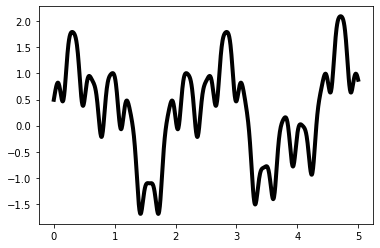

In [ ]:
plt.plot(x, tofit, c='k', lw=4, label='Data')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

data=x.reshape(N,1)
labels=tofit.reshape(N,1)

X=data
N=X.shape[0]
D=X.shape[1]
H1=5
H2=5 #number of hidden nurons
H3=5 #number of hidden nurons          ######### this was 1
H4=5
H5=5
H6=5
H7=1


num_steps = 100000
alpha = .001
lamda=0.001                 # lamda # lamda # lamda   # lamda   # lamda   # lamda


#np.random.seed(s)

# First, initialize our neural network parameters.
params = {}
params['W_1'] = np.random.randn(H1, D)
params['b_1'] = np.zeros([1,H1])
params['W_2'] = np.random.randn(H2, H1)
params['b_2'] = np.zeros([1,H2])

params['W_3'] = np.random.randn(H3, H2)
params['b_3'] = np.zeros([1,H3])
params['W_4'] = np.random.randn(H4, H3)
params['b_4'] = np.zeros([1,H4])


params['W_5'] = np.random.randn(H5, H4)
params['b_5'] = np.zeros([1,H5])
params['W_6'] = np.random.randn(H6, H5)
params['b_6'] = np.zeros([1,H6])

params['W_7'] = np.random.randn(H7, H6)
params['b_7'] = np.zeros([1,H7])

epoch   0 | Loss 0.95
epoch 10000 | Loss 0.30
epoch 20000 | Loss 0.29
epoch 30000 | Loss 0.27
epoch 40000 | Loss 0.26
epoch 50000 | Loss 0.26
epoch 60000 | Loss 0.25
epoch 70000 | Loss 0.25
epoch 80000 | Loss 0.25
epoch 90000 | Loss 0.25


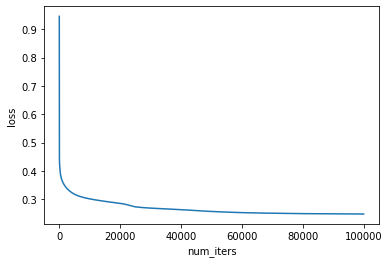

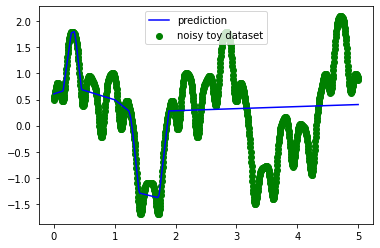

In [ ]:
def Relu(x):
    return x * (x > 0)

# Notice we make use of numpy's broadcasting when adding the bias b.
# this function is designed for testing tuned
def forward_reg(X, params):    
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4'])
    H_4 = Relu(z_4)

    z_5 = np.dot(H_4, params['W_5'].T) + np.dot(np.ones([N,1]),params['b_5'])
    H_5 = Relu(z_5)

    z_6 = np.dot(H_5, params['W_6'].T) + np.dot(np.ones([N,1]),params['b_6'])
    H_6 = Relu(z_6)

    y = np.dot(H_6, params['W_7'].T) +  np.dot(np.ones([N,1]),params['b_7'])
##################################
    return y

def LogisticCrossEntropyLoss (N,t,z):
  return (1./N) * np.sum(t * np.log(1+np.exp(-z)) - (1 - t) * np.log(1 +np.exp(z)))

def CrossEntropyLoss (N,t,y):
  return (1./N) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
##################################################################################
def LeastSquaresLoss (N,t,y):
  return (1/(2*N))*np.dot((y-t).T,(y-t))

def loss_ridge (N,t,y,w1,w2,w3,w4,w5,w6,w7,lamda):    # CHANGE MADE HERE  CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE
  return (((1/(2*N))*np.dot((y-t).T,(y-t))) + ((lamda/(2*N)) * (np.dot(w1.T,w1)[0,0]+np.dot(w2.T,w2)[0,0]+np.dot(w3.T,w3)[0,0]+np.dot(w4.T,w4)[0,0]+np.dot(w5.T,w5)[0,0]+np.dot(w6.T,w6)[0,0]+np.dot(w7.T,w7)[0,0])))
##################################################################################
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

def dRelu(x):
    return 1. * (x > 0)

def backprop_reg(X, t, params, lamda):

    N = X.shape[0] # already defined

    # Perform forwards computation.
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4'])
    H_4 = Relu(z_4)

    z_5 = np.dot(H_4, params['W_5'].T) + np.dot(np.ones([N,1]),params['b_5'])
    H_5 = Relu(z_5)

    z_6 = np.dot(H_5, params['W_6'].T) + np.dot(np.ones([N,1]),params['b_6'])
    H_6 = Relu(z_6)

    y = np.dot(H_6, params['W_7'].T) +  np.dot(np.ones([N,1]),params['b_7'])
##################################
    #loss = LeastSquaresLoss(N,t,y)  
    loss = loss_ridge (N,t,y,params['W_1'],params['W_2'],params['W_3'],params['W_4'],params['W_5'],params['W_6'],params['W_7'],lamda)                ### CHANGE MADE HERE CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE

##################################

    # Perform backwards computation. # over all training egs.
    E_bar = 1
    y_bar = (1./N) * (y - t)
    W_7_bar = np.dot(y_bar.T, H_6) + (lamda/(N))* params['W_7']  # 
    b_7_bar = np.dot(np.ones([1,N]),y_bar)
    H_6_bar = np.dot(y_bar, params['W_7'])   #####    500,1   1,3

    
    #

    z_6_bar = H_6_bar * dRelu(z_6)
    W_6_bar = np.dot(z_6_bar.T,H_5) + (lamda/(N))* params['W_6'] 
    b_6_bar = np.dot(np.ones([1,N]),z_6_bar)
    H_5_bar = np.dot(z_6_bar, params['W_6']) 

    #

    z_5_bar = H_5_bar * dRelu(z_5)
    W_5_bar = np.dot(z_5_bar.T,H_4) + (lamda/(N))* params['W_5'] 
    b_5_bar = np.dot(np.ones([1,N]),z_5_bar)
    H_4_bar = np.dot(z_5_bar, params['W_5']) 
    
    #

    z_4_bar = H_4_bar * dRelu(z_4)
    W_4_bar = np.dot(z_4_bar.T,H_3) + (lamda/(N))* params['W_4'] 
    b_4_bar = np.dot(np.ones([1,N]),z_4_bar)
    H_3_bar = np.dot(z_4_bar, params['W_4']) 

    #

    z_3_bar = H_3_bar * dRelu(z_3)
    W_3_bar = np.dot(z_3_bar.T,H_2) + (lamda/(N))* params['W_3'] 
    b_3_bar = np.dot(np.ones([1,N]),z_3_bar)
    H_2_bar = np.dot(z_3_bar, params['W_3']) 

    #

    z_2_bar = H_2_bar * dRelu(z_2)
    W_2_bar = np.dot(z_2_bar.T,H_1) + (lamda/(N))* params['W_2'] 
    b_2_bar = np.dot(np.ones([1,N]),z_2_bar)
    H_1_bar = np.dot(z_2_bar, params['W_2']) 

    #

    z_1_bar = H_1_bar * dRelu(z_1)
    W_1_bar = np.dot(z_1_bar.T, X) + (lamda/(N))* params['W_1'] 
    b_1_bar = np.dot(np.ones([1,N]),z_1_bar)

    # Wrap our gradients in a dictionary. 
    grads = {}
    grads['W_1'] = W_1_bar
    grads['b_1'] = b_1_bar
    grads['W_2'] = W_2_bar
    grads['b_2'] = b_2_bar
    grads['W_3'] = W_3_bar
    grads['b_3'] = b_3_bar
    grads['W_4'] = W_4_bar
    grads['b_4'] = b_4_bar
    grads['W_5'] = W_5_bar
    grads['b_5'] = b_5_bar
    grads['W_6'] = W_6_bar
    grads['b_6'] = b_6_bar    
    grads['W_7'] = W_7_bar
    grads['b_7'] = b_7_bar

    return grads, loss



lastloss=10000000000
yyy=[]
xxx=[]
for step in range(num_steps):        
    grads, loss = backprop_reg(data, labels, params,lamda) # passing inital params
    yyy.append(loss[0,0])
    xxx.append(step)
    for k in params:
        params[k] -= alpha * grads[k]
    # Print loss every so often.
    if step % 10000 == 0:
        print("epoch {:3d} | Loss {:3.2f}".format(step, loss[0,0]))
        if lastloss-loss[0,0] <=0.0001:
          #break
          print('converged to a delta <=0.0001')
        lastloss=loss[0,0]
plt.figure(1)
plt.plot(xxx,yyy)
plt.xlabel('num_iters')
plt.ylabel("loss")

num_points = N

x1s = np.linspace(0, 5, N)

points = x1s.reshape(N,1)
Y = forward_reg(points, params)
plt.figure(2)
plt.plot(x1s, Y, c='b', label='prediction')
plt.scatter(x,tofit,label='noisy toy dataset',c='g')
plt.legend()

### Regularized MLP-7 W/ bypass

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

data=x.reshape(N,1)
labels=tofit.reshape(N,1)

X=data
N=X.shape[0]
D=X.shape[1]
H1=5
H2=5 #number of hidden nurons
H3=5 #number of hidden nurons          ######### this was 1
H4=5
H5=5
H6=5
H7=1


num_steps = 100000
alpha = .001
lamda=0.001                 # lamda # lamda # lamda   # lamda   # lamda   # lamda


#np.random.seed(s)

# First, initialize our neural network parameters.
params = {}
params['W_1'] = np.random.randn(H1, D)
params['b_1'] = np.zeros([1,H1])
params['W_2'] = np.random.randn(H2, H1)
params['b_2'] = np.zeros([1,H2])

params['W_3'] = np.random.randn(H3, H2)
params['b_3'] = np.zeros([1,H3])
params['W_4'] = np.random.randn(H4, H3)
params['b_4'] = np.zeros([1,H4])


params['W_5'] = np.random.randn(H5, H4)
params['b_5'] = np.zeros([1,H5])
params['W_6'] = np.random.randn(H6, H5)
params['b_6'] = np.zeros([1,H6])

params['W_7'] = np.random.randn(H7, H6)
params['b_7'] = np.zeros([1,H7])

epoch   0 | Loss 0.66
epoch 10000 | Loss 0.33
epoch 20000 | Loss 0.32
epoch 30000 | Loss 0.31
epoch 40000 | Loss 0.31
epoch 50000 | Loss 0.31
epoch 60000 | Loss 0.31
epoch 70000 | Loss 0.31
epoch 80000 | Loss 0.30
epoch 90000 | Loss 0.30


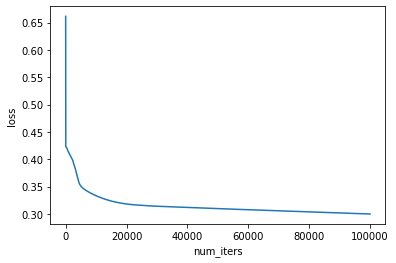

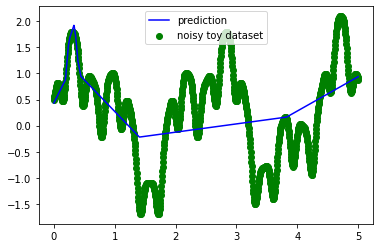

In [ ]:
def Relu(x):
    return x * (x > 0)

# Notice we make use of numpy's broadcasting when adding the bias b.
# this function is designed for testing tuned
def forward_reg(X, params):    
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4']) + H_2 # adding bypass         CHANGE MADE HERE     CHANGE MADE HERE     CHANGE MADE HERE
    H_4 = Relu(z_4)

    z_5 = np.dot(H_4, params['W_5'].T) + np.dot(np.ones([N,1]),params['b_5'])
    H_5 = Relu(z_5)

    z_6 = np.dot(H_5, params['W_6'].T) + np.dot(np.ones([N,1]),params['b_6'])
    H_6 = Relu(z_6)

    y = np.dot(H_6, params['W_7'].T) +  np.dot(np.ones([N,1]),params['b_7'])
##################################
    return y


def LogisticCrossEntropyLoss (N,t,z):
  return (1./N) * np.sum(t * np.log(1+np.exp(-z)) - (1 - t) * np.log(1 +np.exp(z)))

def CrossEntropyLoss (N,t,y):
  return (1./N) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
##################################################################################
def LeastSquaresLoss (N,t,y):
  return (1/(2*N))*np.dot((y-t).T,(y-t))

def loss_ridge (N,t,y,w1,w2,w3,w4,w5,w6,w7,lamda):    # CHANGE MADE HERE  CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE
  return (((1/(2*N))*np.dot((y-t).T,(y-t))) + ((lamda/(2*N)) * (np.dot(w1.T,w1)[0,0]+np.dot(w2.T,w2)[0,0]+np.dot(w3.T,w3)[0,0]+np.dot(w4.T,w4)[0,0]+np.dot(w5.T,w5)[0,0]+np.dot(w6.T,w6)[0,0]+np.dot(w7.T,w7)[0,0])))
##################################################################################
def softmax(x):
    exps = np.exp(x)
    return exps / np.sum(exps)

def dRelu(x):
    return 1. * (x > 0)

def backprop_reg(X, t, params, lamda):

    N = X.shape[0] # already defined

    # Perform forwards computation.
    z_1 = np.dot(X, params['W_1'].T)  + np.dot(np.ones([N,1]),params['b_1'])
    H_1 = Relu(z_1)
    z_2 = np.dot(H_1, params['W_2'].T) + np.dot(np.ones([N,1]),params['b_2'])
    H_2 = Relu(z_2)
#################################
    z_3 = np.dot(H_2, params['W_3'].T) + np.dot(np.ones([N,1]),params['b_3'])
    H_3 = Relu(z_3)
    
    z_4 = np.dot(H_3, params['W_4'].T) + np.dot(np.ones([N,1]),params['b_4']) + H_2 # adding bypass         CHANGE MADE HERE     CHANGE MADE HERE     CHANGE MADE HERE
    H_4 = Relu(z_4)

    z_5 = np.dot(H_4, params['W_5'].T) + np.dot(np.ones([N,1]),params['b_5'])
    H_5 = Relu(z_5)

    z_6 = np.dot(H_5, params['W_6'].T) + np.dot(np.ones([N,1]),params['b_6'])
    H_6 = Relu(z_6)

    y = np.dot(H_6, params['W_7'].T) +  np.dot(np.ones([N,1]),params['b_7'])
##################################
    #loss = LeastSquaresLoss(N,t,y)  
    loss = loss_ridge (N,t,y,params['W_1'],params['W_2'],params['W_3'],params['W_4'],params['W_5'],params['W_6'],params['W_7'],lamda)                ### CHANGE MADE HERE CHANGE MADE HERE    CHANGE MADE HERE    CHANGE MADE HERE

##################################

    # Perform backwards computation. # over all training egs.
    E_bar = 1
    y_bar = (1./N) * (y - t)
    W_7_bar = np.dot(y_bar.T, H_6) + (lamda/(N))* params['W_7']  # 
    b_7_bar = np.dot(np.ones([1,N]),y_bar)
    H_6_bar = np.dot(y_bar, params['W_7'])   #####    500,1   1,3

    #

    z_6_bar = H_6_bar * dRelu(z_6)
    W_6_bar = np.dot(z_6_bar.T,H_5) + (lamda/(N))* params['W_6'] 
    b_6_bar = np.dot(np.ones([1,N]),z_6_bar)
    H_5_bar = np.dot(z_6_bar, params['W_6']) 

    #

    z_5_bar = H_5_bar * dRelu(z_5)
    W_5_bar = np.dot(z_5_bar.T,H_4) + (lamda/(N))* params['W_5'] 
    b_5_bar = np.dot(np.ones([1,N]),z_5_bar)
    H_4_bar = np.dot(z_5_bar, params['W_5']) 

    #

    z_4_bar = H_4_bar * dRelu(z_4)
    W_4_bar = np.dot(z_4_bar.T,H_3) + (lamda/(N))* params['W_4'] 
    b_4_bar = np.dot(np.ones([1,N]),z_4_bar)
    H_3_bar = np.dot(z_4_bar, params['W_4']) 

    #

    z_3_bar = H_3_bar * dRelu(z_3)
    W_3_bar = np.dot(z_3_bar.T,H_2) + (lamda/(N))* params['W_3'] 
    b_3_bar = np.dot(np.ones([1,N]),z_3_bar)
    H_2_bar = np.dot(z_3_bar, params['W_3']) +  z_4_bar#    CHANGE MADE HERE     CHANGE MADE HERE      CHANGE MADE HERE        CHANGE MADE HERE

    #

    z_2_bar = H_2_bar * dRelu(z_2)
    W_2_bar = np.dot(z_2_bar.T,H_1) + (lamda/(N))* params['W_2'] 
    b_2_bar = np.dot(np.ones([1,N]),z_2_bar)
    H_1_bar = np.dot(z_2_bar, params['W_2']) 

    #

    z_1_bar = H_1_bar * dRelu(z_1)
    W_1_bar = np.dot(z_1_bar.T, X) + (lamda/(N))* params['W_1'] 
    b_1_bar = np.dot(np.ones([1,N]),z_1_bar)


    # Wrap our gradients in a dictionary. 
    grads = {}
    grads['W_1'] = W_1_bar
    grads['b_1'] = b_1_bar
    grads['W_2'] = W_2_bar
    grads['b_2'] = b_2_bar
    grads['W_3'] = W_3_bar
    grads['b_3'] = b_3_bar
    grads['W_4'] = W_4_bar
    grads['b_4'] = b_4_bar
    grads['W_5'] = W_5_bar
    grads['b_5'] = b_5_bar
    grads['W_6'] = W_6_bar
    grads['b_6'] = b_6_bar    
    grads['W_7'] = W_7_bar
    grads['b_7'] = b_7_bar

    return grads, loss



lastloss=10000000000
yyy=[]
xxx=[]
for step in range(num_steps):        
    grads, loss = backprop_reg(data, labels, params,lamda) # passing inital params
    yyy.append(loss[0,0])
    xxx.append(step)
    for k in params:
        params[k] -= alpha * grads[k]
    # Print loss every so often.
    if step % 10000 == 0:
        print("epoch {:3d} | Loss {:3.2f}".format(step, loss[0,0]))
        if lastloss-loss[0,0] <=0.0001:
          #break
          print('converged to a delta <=0.0001')
        lastloss=loss[0,0]
plt.figure(1)
plt.plot(xxx,yyy)
plt.xlabel('num_iters')
plt.ylabel("loss")

num_points = N

x1s = np.linspace(0, 5, N)

points = x1s.reshape(N,1)
Y = forward_reg(points, params)
plt.figure(2)
plt.plot(x1s, Y, c='b', label='prediction')
plt.scatter(x,tofit,label='noisy toy dataset',c='g')
plt.legend()

MLP-7, H=5 in all except last layer where H=1 (regression), Relu activation for all:
- Unregularized, Loss 0.25
- Regularized, Loss 0.25
- Regularized ByPass, Loss 0.30

# Discussion

MLP-5, H=5 in all except last layer where H=1 (regression), Relu activation for all:
- Unregularized, Loss 0.11
- Regularized, Loss 0.27
- Regularized ByPassLoss 0.14

MLP-7, H=5 in all except last layer where H=1 (regression), Relu activation for all:
- Unregularized, Loss 0.25
- Regularized, Loss 0.25
- Regularized ByPass, Loss 0.30

what we should be seeing here is that the regularized bypass error is decreasing with increased number of layers proving the efficacy of the resnet bypass theory in basically allowing for deeper networks to get lower training error with uncreased depth. unfortunatley here we dont see this. 

I think this is due to the sheer variablility in what our loss is converging to due to the ambiguity of the performance surface and our lack of proper search for optimal starting parameterization. so model behaviour is probably not representitive of what it should be as we end up taking some local minima.